In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

In [2]:
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

In [3]:
samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0008_045", "4hr_replicate": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "8hr_replicate": "A0021_038", "11hr": "A0008_046", "12hr": "A0021_046"}

In [4]:
s_genes = list(pd.read_csv("./../../MouseInfection/s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../MouseInfection/g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [5]:
ovary_raw = pd.read_csv("./../scRNAseq_references/Ovary_subset_0_count_data.csv", index_col=0, header = 0, delimiter=",")
print(ovary_raw.shape)
ovary_meta_data = pd.read_csv("./../scRNAseq_references/Ovary_subset_0_meta_data.csv", index_col = 0)
print(ovary_meta_data.shape)


(25289, 28014)
(28014, 16)


In [6]:
ovary_meta_data

,nGene,nUMI,orig.ident,batch,fraction.mito,condition,dominant_index,percent_dominant,Level0,doubletSimScore,doubletSimCall,mouse,Level1,Level2,nCount_RNA,nFeature_RNA
mary_34557529_1.1.1A_000093,4944,12529,mary,cycling,0.076143,E,0,100,Granulosa,0.152041,0,1A,GC_CL_Active,GC_CL_Active,12529,4944
mary_34557529_1.1.1A_000112,944,1468,mary,cycling,0.106267,E,0,100,Granulosa,0.046531,0,1A,GC_Mitotic,GC_Mitotic,1468,944
mary_34557529_1.1.1A_000188,1648,3312,mary,cycling,0.105374,E,0,100,Granulosa,0.112857,0,1A,GC_Estrous,GC_Estrous,3312,1648
mary_34557529_1.1.1A_000199,919,1617,mary,cycling,0.109462,E,0,100,Granulosa,0.074286,0,1A,GC_Estrous,GC_Estrous,1617,919
mary_34557529_1.1.1A_000281,1626,3080,mary,cycling,0.134416,E,0,100,Granulosa,0.080612,0,1A,GC_Mitotic,GC_Mitotic,3080,1626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mary_34888857_1.1.3B_231468,2500,4645,mary,cycling,0.016577,P,0,100,Oocyte,0.144082,0,3B,Oocyte,Oocyte,4645,2500
mary_34951933_2.1.4E_307794,3014,6607,mary,cycling,0.019071,P,0,100,Oocyte,0.143469,0,4E,Oocyte,Oocyte,6607,3014
mary_34951933_4.2.4D_348675,2161,4354,mary,cycling,0.117850,D,0,100,Oocyte,0.132041,0,4D,Oocyte,Oocyte,4353,2160
mary_34955931_4.1.3A_461622,2203,3925,mary,cycling,0.045350,D,7,100,Oocyte,0.143469,0,3A,Oocyte,Oocyte,3925,2203


In [8]:
ovary_meta_data["condition"].value_counts()

D    8790
E    7220
P    6003
M    6001
Name: condition, dtype: int64

In [9]:
ovary_meta_data["Level1"].value_counts()

GC_Preantral             4154
GC_Antral                3319
M_Cortical Stroma        2801
GC_Mitotic               2308
EN_Blood                 2268
GC_Atretic               2160
M_Immature Theca         1560
M_Steroidogenic Theca    1263
M_Medullary Stroma       1187
I_Macrophage              941
GC_Estrous                857
Epithelium                845
M_Smooth Muscle           775
M_Dividing Mesenchyme     749
M_Pericyte                599
GC_CL_Active              559
GC_CL_Lytic               536
EN_Lymph                  400
GC_Mural                  338
I_T_Cell                  228
I_Dendritic_Cell           94
I_B_Cell                   31
I_Granulocyte              29
Oocyte                     13
Name: Level1, dtype: int64

In [13]:
ovary_meta_data[ovary_meta_data["condition"].isin(["E"])]["Level1"].value_counts()

GC_Preantral             876
GC_Estrous               857
M_Cortical Stroma        845
GC_Atretic               569
GC_Mitotic               512
GC_Antral                464
M_Medullary Stroma       403
EN_Blood                 394
M_Immature Theca         358
M_Steroidogenic Theca    349
I_Macrophage             266
Epithelium               222
M_Smooth Muscle          207
GC_CL_Lytic              173
GC_CL_Active             159
GC_Mural                 144
M_Dividing Mesenchyme    141
M_Pericyte                99
EN_Lymph                  75
I_T_Cell                  61
I_Dendritic_Cell          35
I_B_Cell                   9
I_Granulocyte              1
Oocyte                     1
Name: Level1, dtype: int64

In [15]:
counts = ovary_meta_data.value_counts(subset=["condition", "Level1"]).unstack()
# counts = counts.div(counts.sum(axis=1), axis=0)
# counts = pd.DataFrame(counts.stack().astype("float"), columns=["Proportions"])
# counts = counts.join(counts.index.to_frame())
# counts.index = [i for i in range(counts.shape[0])]
# counts["Celltype"] = counts.apply(lambda x: x["Level1_max_pred_celltype"].split("Level1_")[1],axis=1)
counts

Level1,EN_Blood,EN_Lymph,Epithelium,GC_Antral,GC_Atretic,GC_CL_Active,GC_CL_Lytic,GC_Estrous,GC_Mitotic,GC_Mural,...,I_Macrophage,I_T_Cell,M_Cortical Stroma,M_Dividing Mesenchyme,M_Immature Theca,M_Medullary Stroma,M_Pericyte,M_Smooth Muscle,M_Steroidogenic Theca,Oocyte
condition,,,,,,,,,,,,,,,,,,,,,
D,849.0,77.0,205.0,1036.0,662.0,106.0,157.0,NaN,866.0,71.0,...,282.0,55.0,751.0,293.0,571.0,282.0,199.0,186.0,417.0,7.0
E,394.0,75.0,222.0,464.0,569.0,159.0,173.0,857.0,512.0,144.0,...,266.0,61.0,845.0,141.0,358.0,403.0,99.0,207.0,349.0,1.0
M,590.0,169.0,301.0,733.0,457.0,133.0,60.0,NaN,469.0,14.0,...,172.0,78.0,663.0,176.0,366.0,263.0,139.0,214.0,290.0,NaN
P,435.0,79.0,117.0,1086.0,472.0,161.0,146.0,NaN,461.0,109.0,...,221.0,34.0,542.0,139.0,265.0,239.0,162.0,168.0,207.0,5.0


In [16]:
counts.to_csv("./csvs/pepin_celltype_counts_conditions.csv")

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


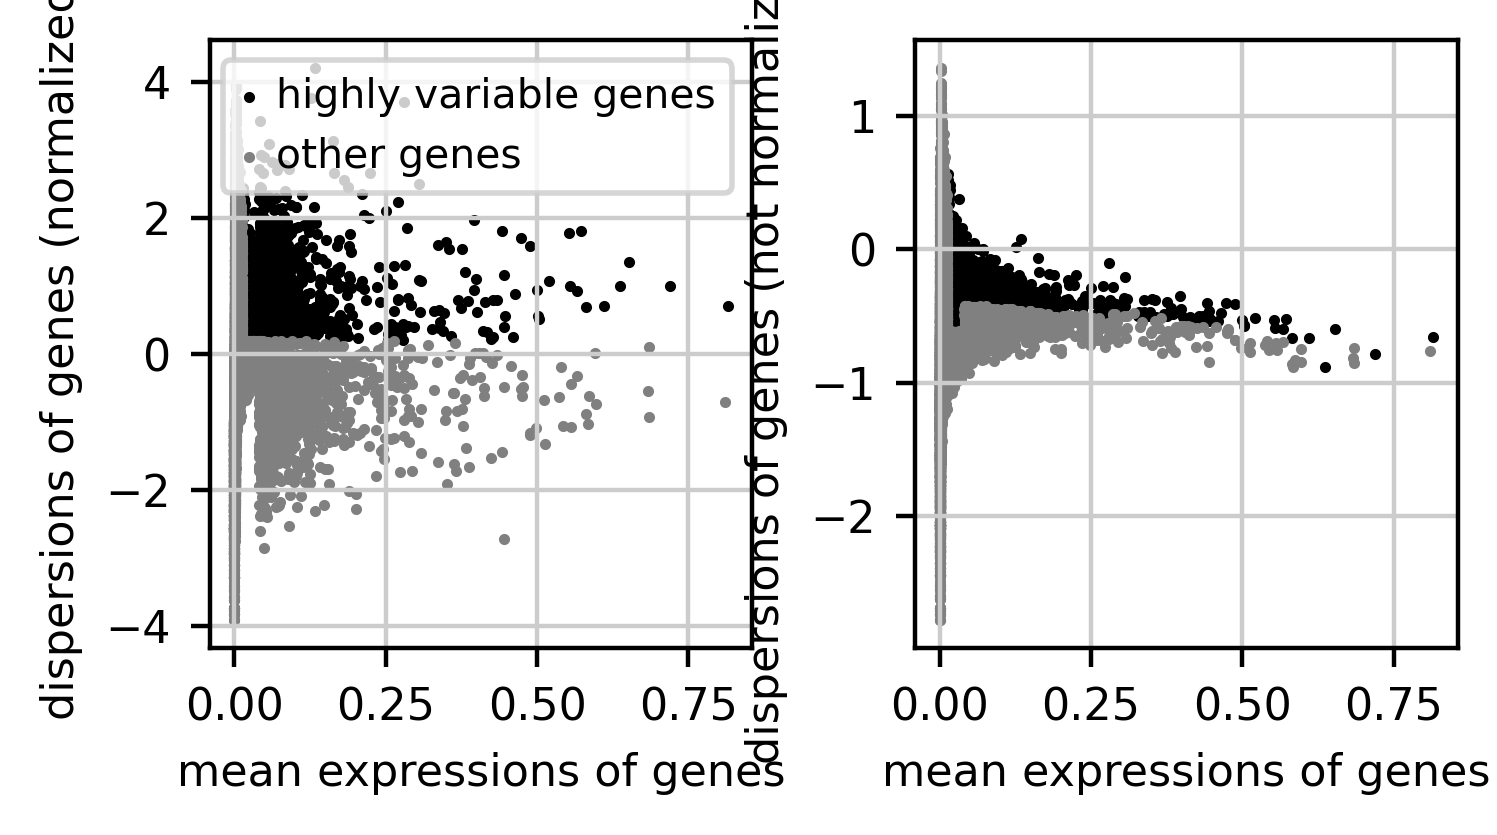

(1775, 3362)


/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


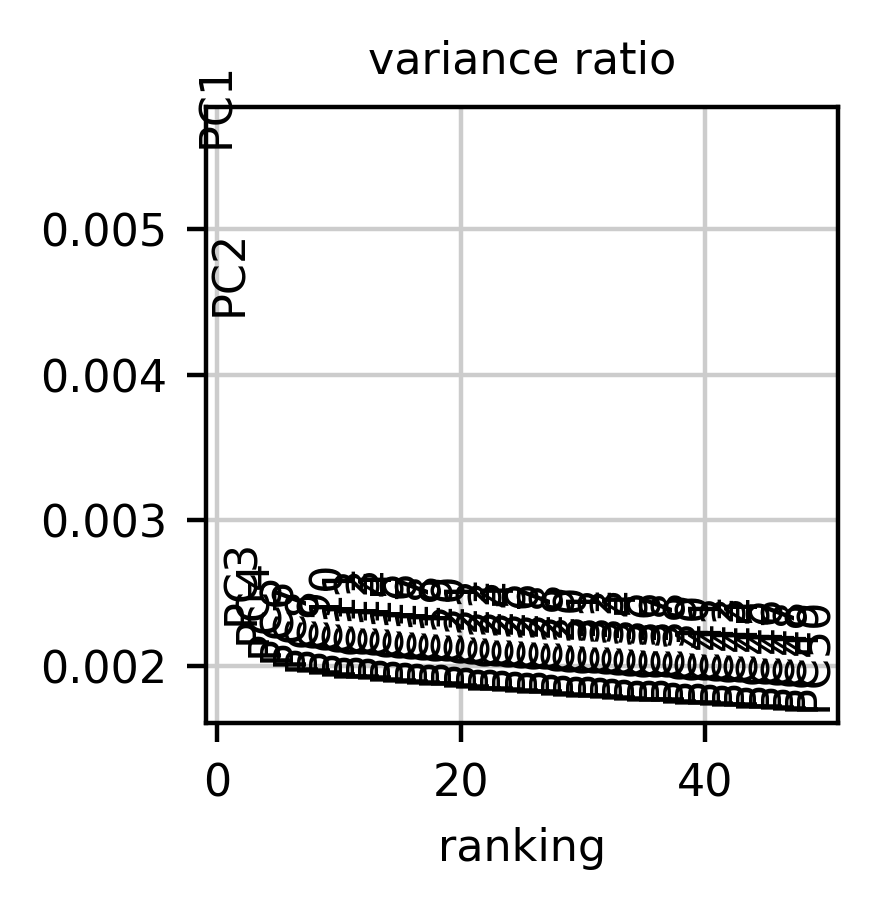

In [53]:
sc.pp.normalize_total(oocytes, inplace=True)
sc.pp.log1p(oocytes)
sc.tl.score_genes_cell_cycle(oocytes, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.highly_variable_genes(oocytes, max_mean=3, min_disp=0.20)
sc.pl.highly_variable_genes(oocytes)
oocytes = oocytes[:, oocytes.var.highly_variable]
print(oocytes.shape)
sc.pp.regress_out(oocytes, ["total_counts"])
sc.pp.scale(oocytes, max_value=10)
sc.pp.pca(oocytes, random_state= 0)
sc.pl.pca_variance_ratio(oocytes, n_pcs = 50)
sc.pp.neighbors(oocytes, n_pcs=20)
sc.tl.umap(oocytes)

In [54]:
sc.tl.leiden(oocytes, key_added="oocyte_leiden_0.2", resolution = 0.2)
sc.tl.leiden(oocytes, key_added="oocyte_leiden_0.5", resolution = 0.5)


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home

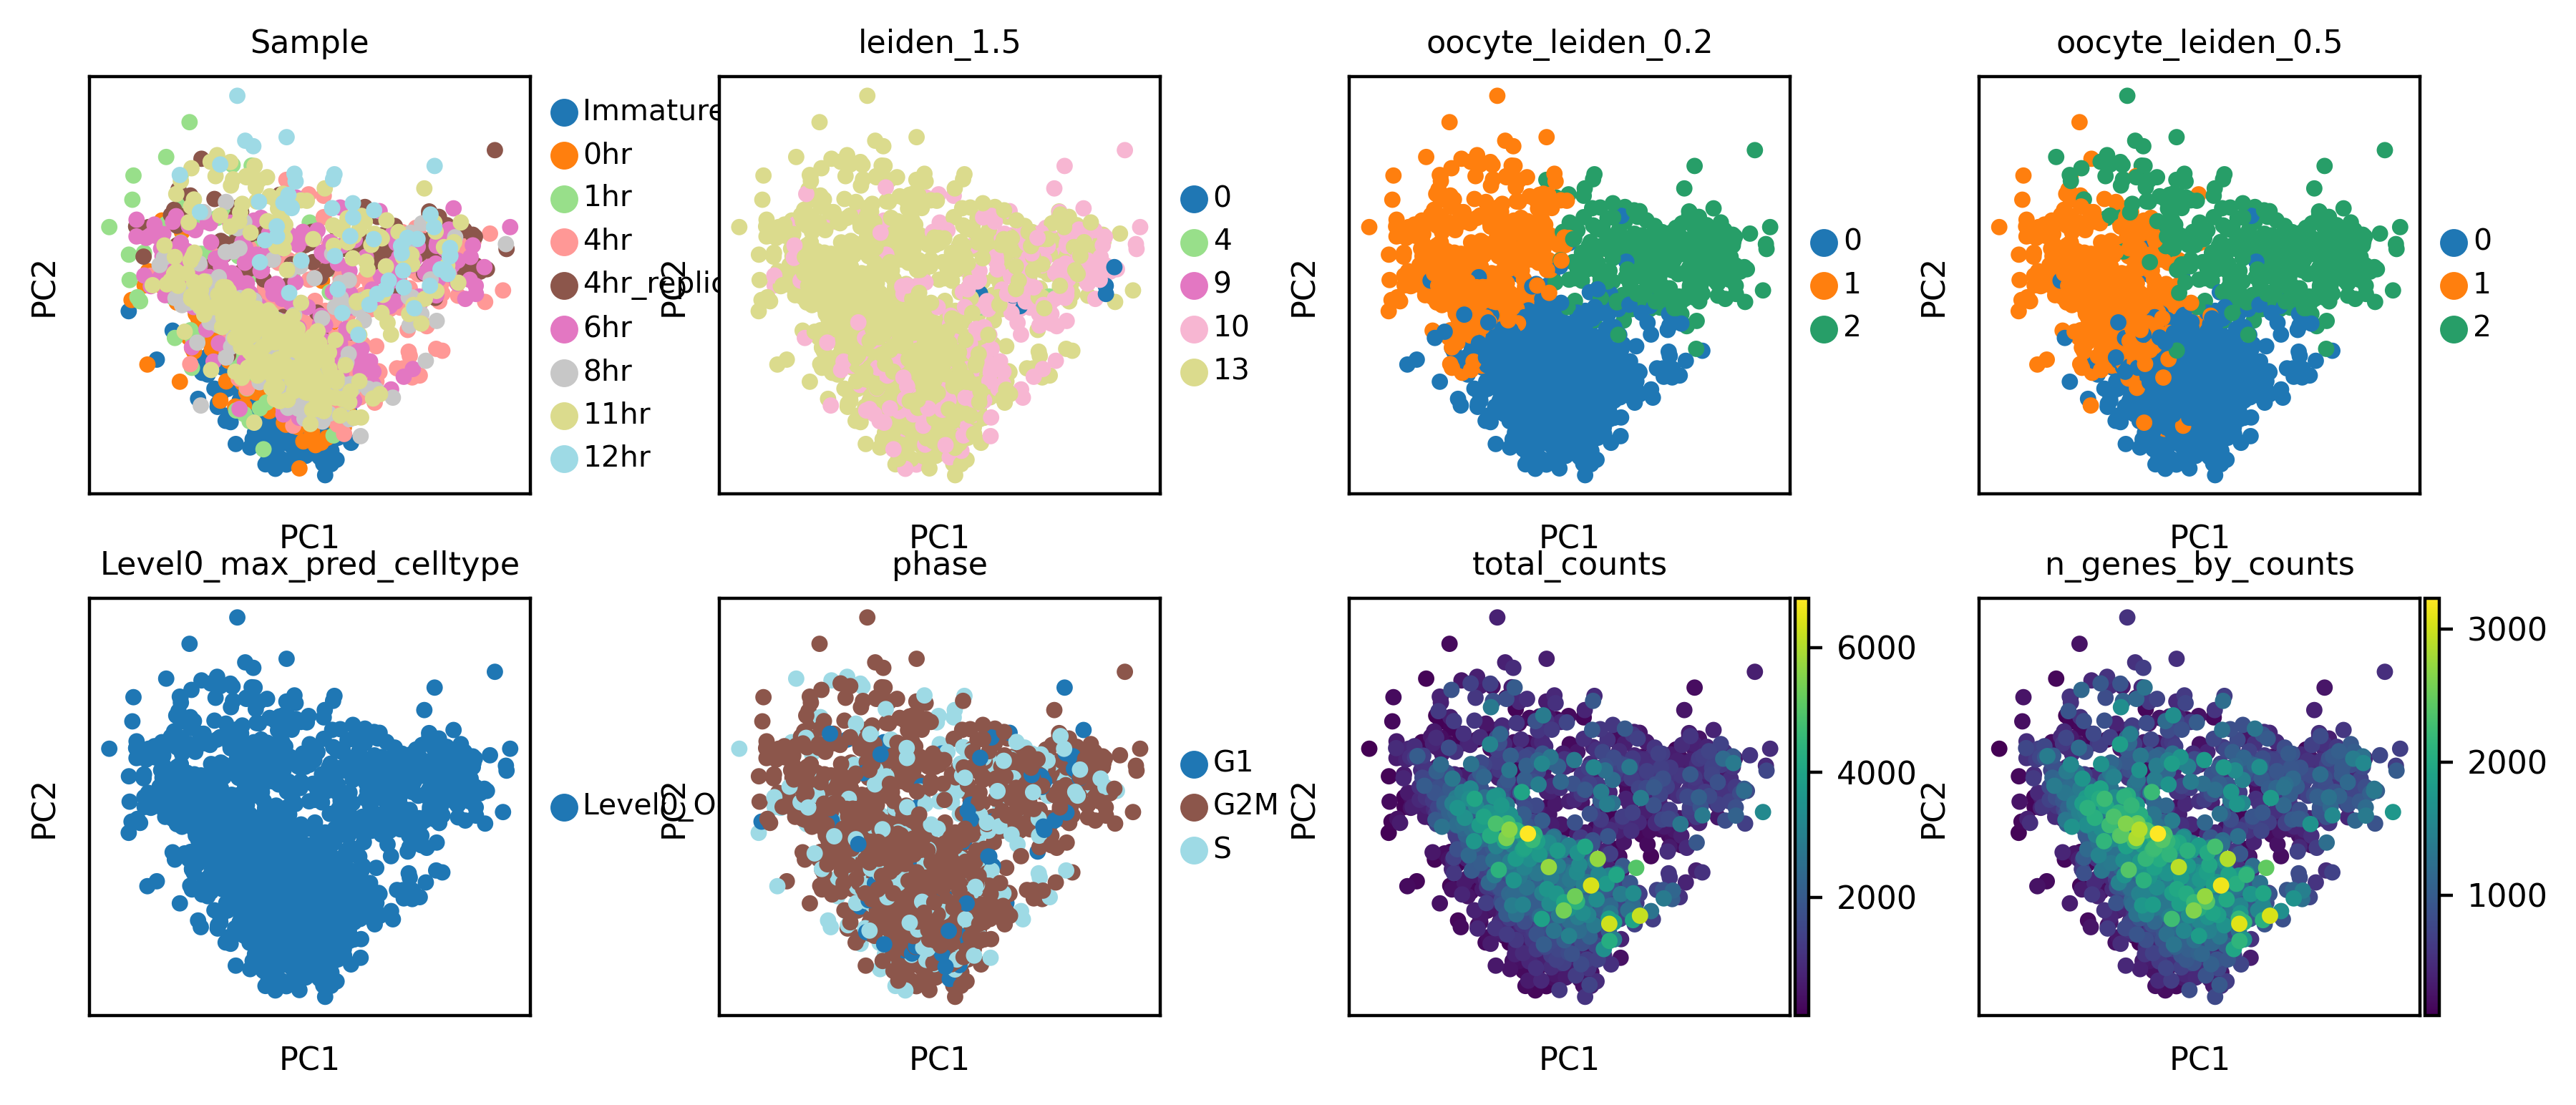

In [55]:
sc.pl.pca(oocytes, color = ["Sample", "leiden_1.5", "oocyte_leiden_0.2", "oocyte_leiden_0.5", "Level0_max_pred_celltype", "phase", "total_counts", "n_genes_by_counts"], ncols=4, wspace=0.3)

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home

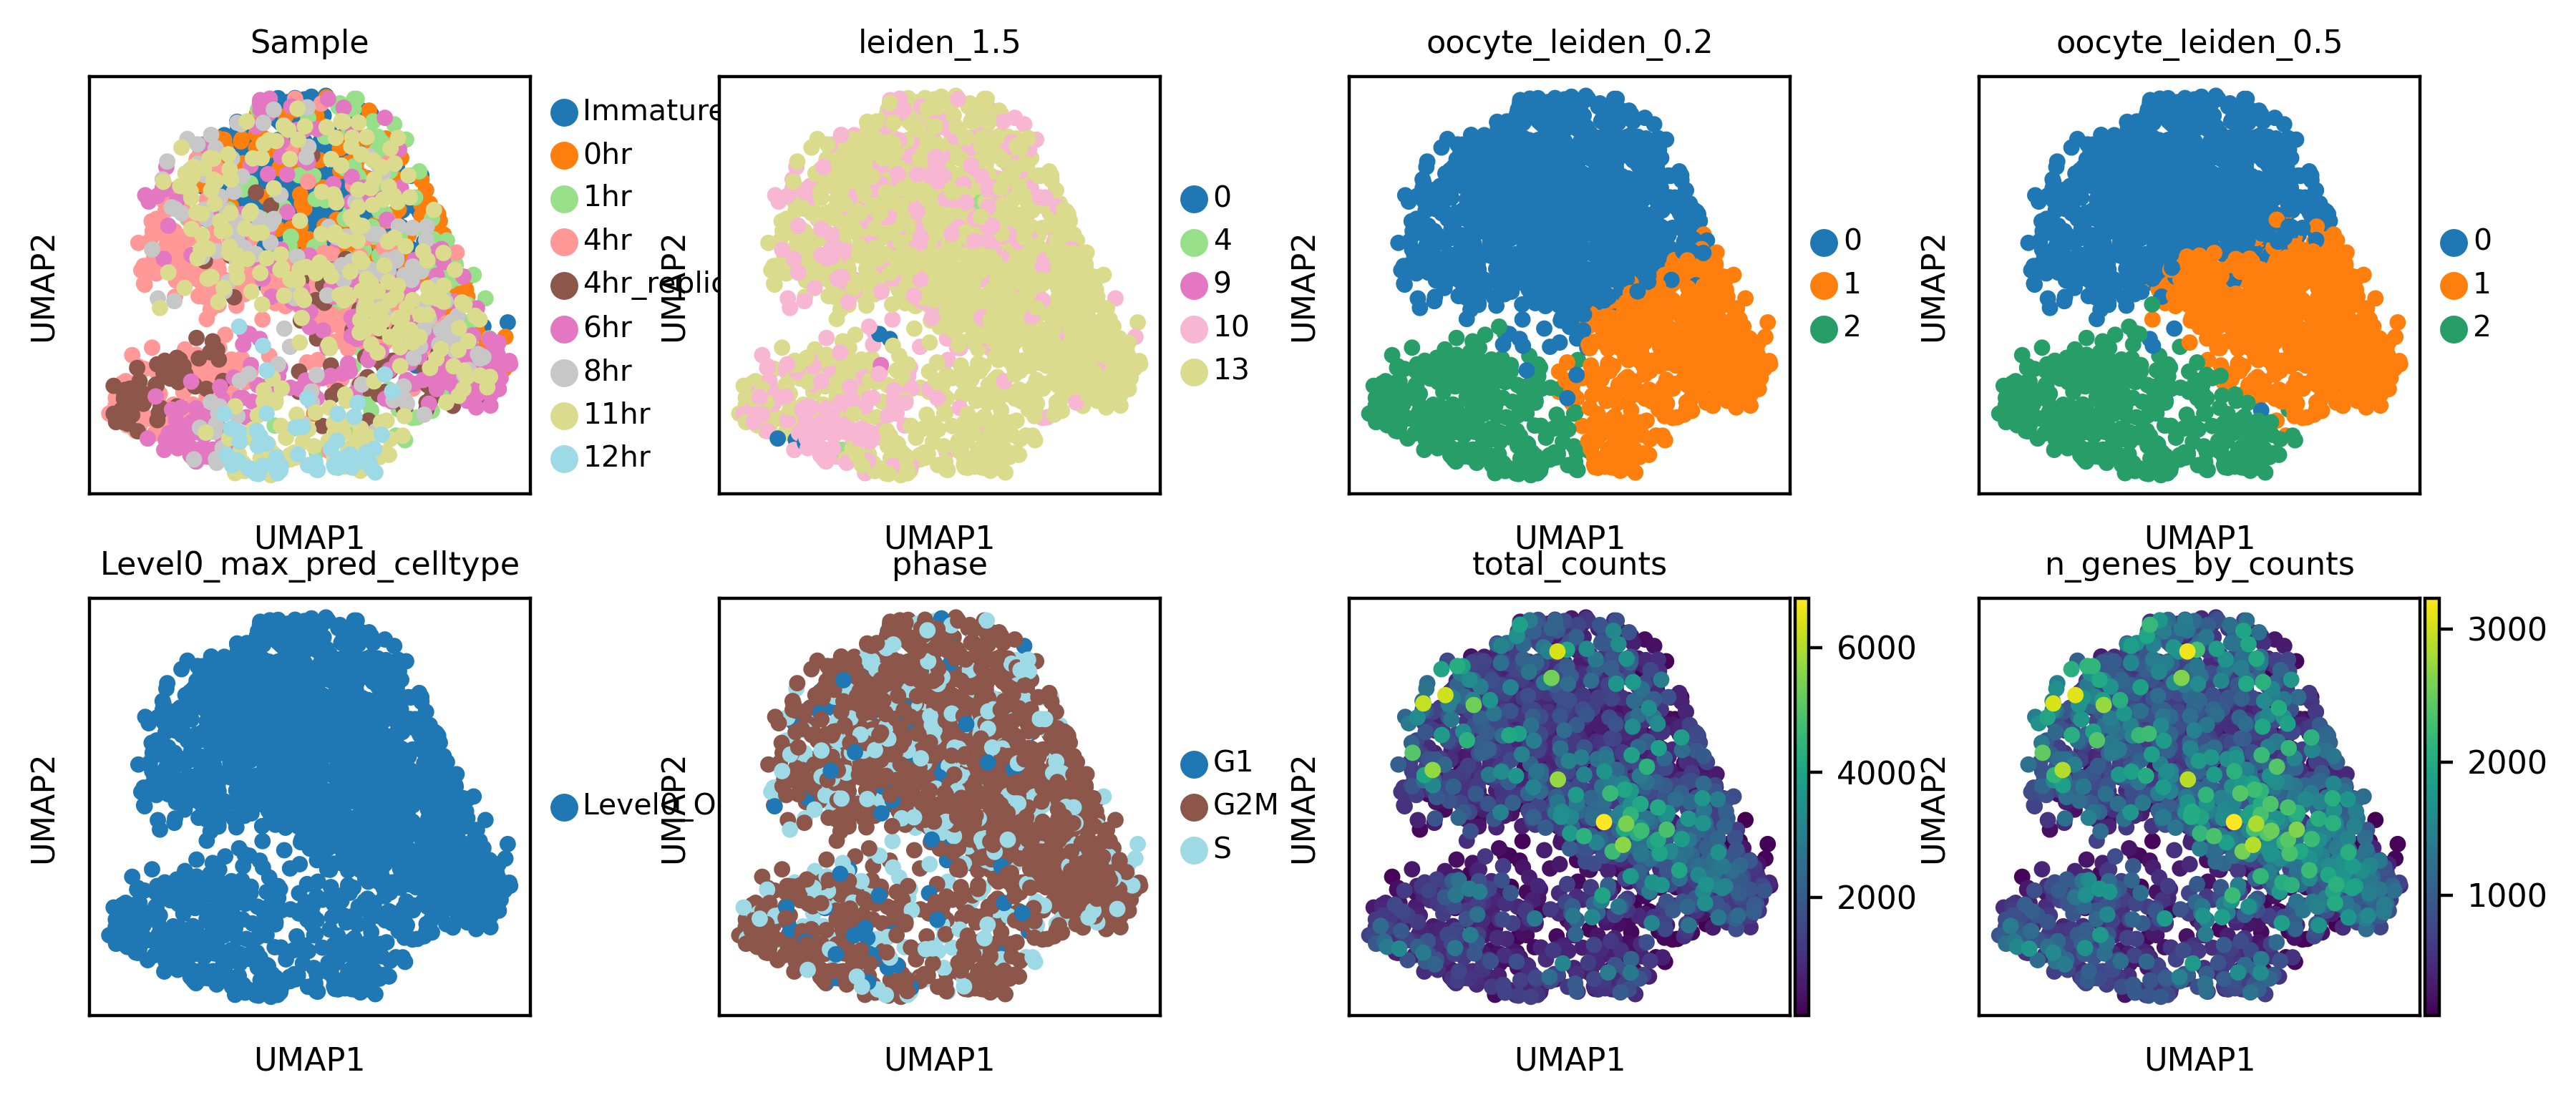

In [56]:
sc.pl.umap(oocytes, color = ["Sample", "leiden_1.5", "oocyte_leiden_0.2", "oocyte_leiden_0.5", "Level0_max_pred_celltype", "phase", "total_counts", "n_genes_by_counts"], ncols=4, wspace=0.3)